<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/R%20for%20Beginners/eda_dataExplorer_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# **Data Exploration with DataExplorer in R**



## Introduction

**DataExplorer** simplifies simplifies exploring and visualizing data, particularly for initial exploratory data analysis (EDA) tasks. The package is designed to automate the data exploration process for analytical tasks and predictive modeling, enabling users to focus on understanding data and extracting insights. It meticulously scans and analyzes each variable and presents them visually using typical graphical techniques, such as histograms, scatter plots, and box plots. The package can help with various tasks throughout the data exploration, including **Exploratory Data Analysis (EDA**), **Feature Engineering**, and **Data Reporting**. With its user-friendly interface, DataExplorer enables users to interact with their data quickly and efficiently, facilitating the identification of patterns and outliers that are critical to understanding the data.

![alt text](http://drive.google.com/uc?export=view&id=1BDF41Hk_CPiSJ1eQCuerb5BxYvXKdqEZ)



## Install rpy2
Easy way to run R in Colab with Python runtime using rpy2 python package. We have to install this package using the `pip` command:

In [ ]:
!pip uninstall rpy2 -y
! pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314935 sha256=345b719f26aaeff5ab13f73dd25249c142e53ddde887246ff3d5d433d0865779
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2


##  Mount Google Drive

Then you must create a folder in Goole drive named "R" to install all packages permanently. Before installing R-package in Python runtime. You have to mount Google Drive and follow on-screen instruction:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Check and Install Required R Packages

In [ ]:
%%R
pkg <- c('tidyverse',
         'janitor'
         )
new.packages <- pkg[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

## Install DataExplorer

In [ ]:
! apt-get install -y r-cran-igraph

In [ ]:
%%R
install.packages("xfun", lib='drive/My Drive/R/')
devtools::install_github("boxuancui/DataExplorer", lib='drive/My Drive/R/')

## Load Packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
library(tidyverse)
library(janitor)
library(DataExplorer)


## Data


The data set use in this exercise can be downloaded from my [Dropbox](https://www.dropbox.com/scl/fo/fohioij7h503duitpl040/h?rlkey=3voumajiklwhgqw75fe8kby3o&dl=0) or from my [Github](https://github.com/zia207/r-colab/tree/main/Data/R_Beginners) account.

We will use `read_csv()` function of **readr** package to import data as a **tidy** data.

In [ ]:
%%R
mf<-read_csv("https://github.com/zia207/r-colab/raw/main/Data/R_Beginners/gp_soil_data_na.csv")

Rows: 471 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): STATE, COUNTY, NLCD, FRG
dbl (15): ID, FIPS, STATE_ID, Longitude, Latitude, SOC, DEM, Aspect, Slope, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Data Reoprting

With the `create_report()` function of the **DataExplorer** package, you can effortlessly generate a visually appealing and informative HTML document that summarizes your data. This report can be saved and conveniently opened in your web browser. You can also customize the report to display data in the context of a single most important variable in your dataset. By running the `create_report()` function on two different datasets, you can easily observe how the report presents the data in a distinct manner for each input. This feature makes it a powerful tool for data analysis, as it helps you to identify patterns and trends in your data swiftly and efficiently.


In [ ]:
# df  |>  dplyr::select(NLCD, SOC, DEM, MAP, MAT, NDVI)  |>
# create_report(y = "SOC")

## Exploratory Data Analysis (EDA)

Instead of running `create_report`, you may also run each function individually for your analysis, e.g.,

### Describe basic information of the data

`introduce()` function describe basic information for input data.

In [ ]:
%%R
mf  |>
  dplyr::select(NLCD, SOC, DEM, MAP, MAT, NDVI)  |>
  introduce()

# A tibble: 1 × 9
   rows columns discrete_columns continuous_columns all_missing_columns
  <int>   <int>            <int>              <int>               <int>
1   471       6                1                  5                   0
# ℹ 4 more variables: total_missing_values <int>, complete_rows <int>,
#   total_observations <int>, memory_usage <dbl>


### Plot basic data information

`plot_intro()` Plot basic information (from introduce) for input data.

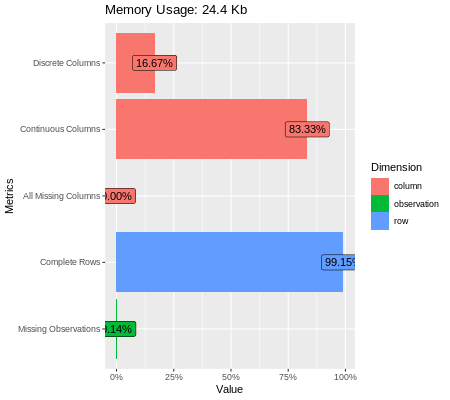

In [ ]:
%%R -w 450 -h 400 -u px

mf  |>
  dplyr::select(NLCD, SOC, DEM, MAP, MAT, NDVI)  |>
  plot_intro()

### Missing data

`plot_missing()` function returns and plots frequency of missing values for each feature.


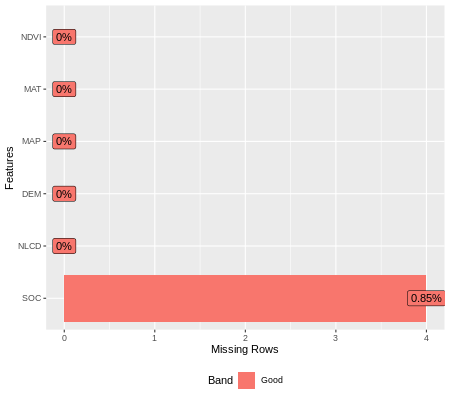

In [ ]:
%%R -w 450 -h 400 -u px

mf  |>
  dplyr::select(NLCD, SOC, DEM, MAP, MAT, NDVI)  |>
  plot_missing()

### Frequency distribution of discrete variables

`plot_bar()` create chart of  discrete feature, based on either frequency or another continuous feature.

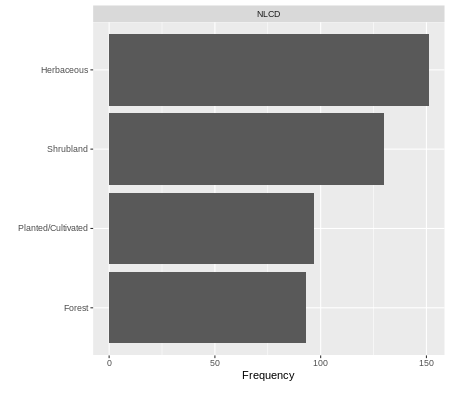

In [ ]:
%%R -w 450 -h 400 -u px

mf  |>
  dplyr::select(NLCD, SOC)  |>
  plot_bar()

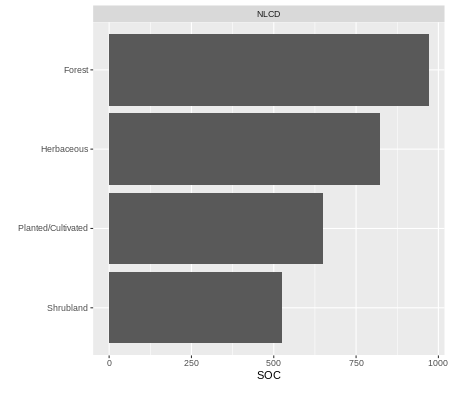

In [ ]:
%%R -w 450 -h 400 -u px
# View frequency distribution with a continuous variable
mf  |>
  dplyr::select(SOC, NLCD)  |>
  plot_bar(with ='SOC')

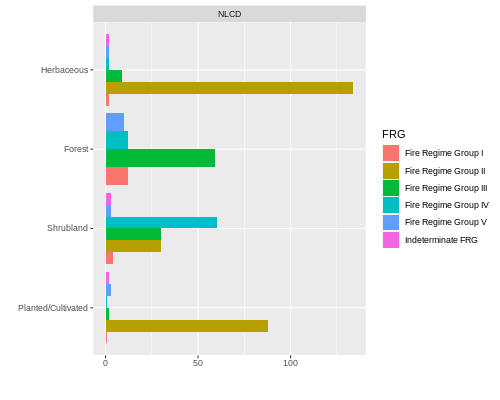

In [ ]:
%%R -w 500 -h 400 -u px

# View frequency distribution by a discrete variable
mf  |>
  dplyr::select(NLCD, FRG)  |>
  plot_bar(by = 'FRG', by_position = "dodge")

### Plot histogram

`plot_histogram()` create histogram  for each continuous feature

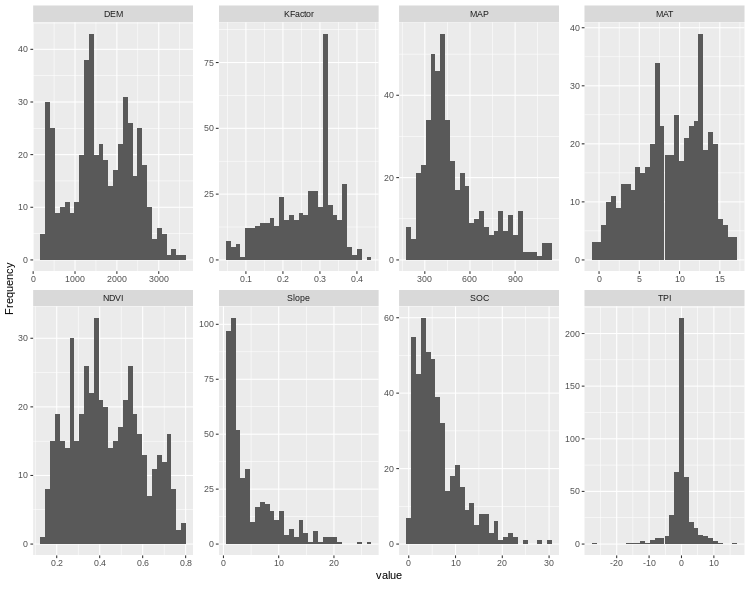

In [ ]:
%%R -w 750 -h 600 -u px

# View frequency distribution by a discrete variable
mf  |>
  dplyr::select(SOC, DEM, MAP, MAT, NDVI, KFactor, Slope, TPI)  |>
  plot_histogram()

### Plot density

`plot_density()` plot estimated density distribution of all continuous variables


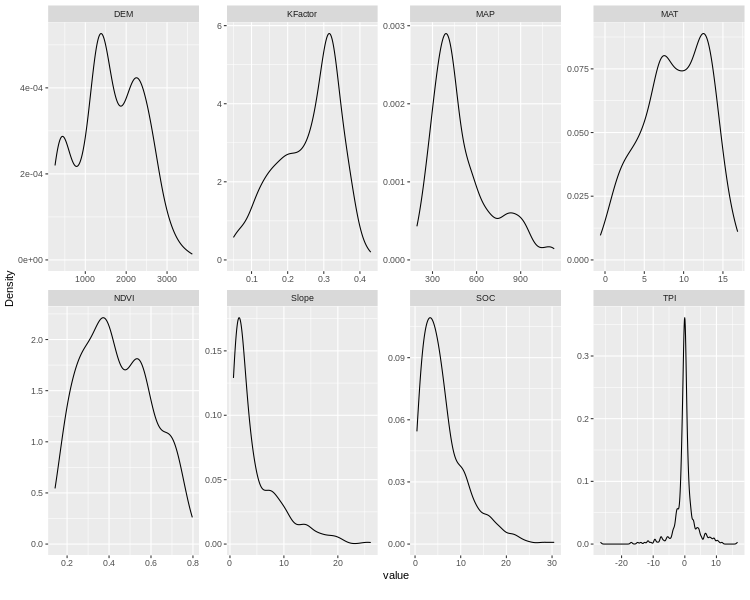

In [ ]:
%%R -w 750 -h 600 -u px

mf  |>
  dplyr::select(SOC, DEM, MAP, MAT, NDVI, KFactor, Slope, TPI)  |>
  plot_density()

### Quantile-quantile plot

`plot_qq()` create quantile-quantile plot of all continuous variables

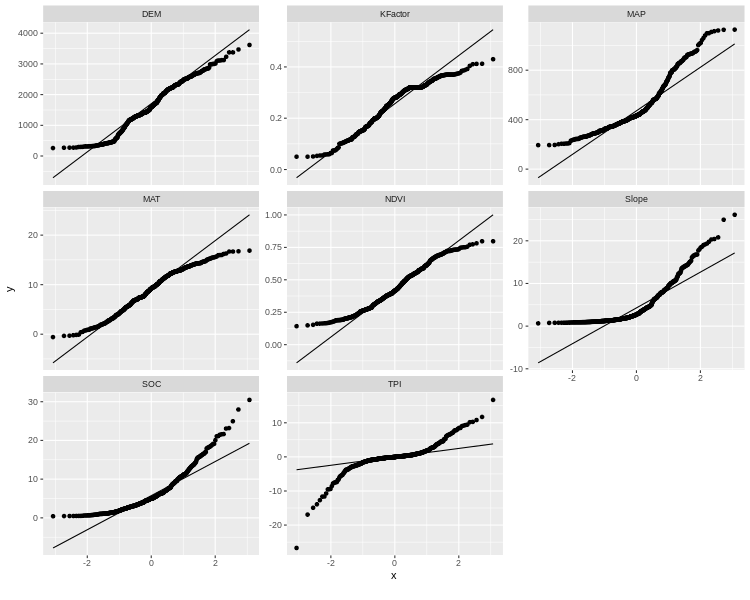

In [ ]:
%%R -w 750 -h 600 -u px

mf  |>
  dplyr::select(SOC, DEM, MAP, MAT, NDVI, KFactor, Slope, TPI)  |>
  plot_qq()

We can view  quantile-quantile plot of all continuous variables by feature `NLCD`

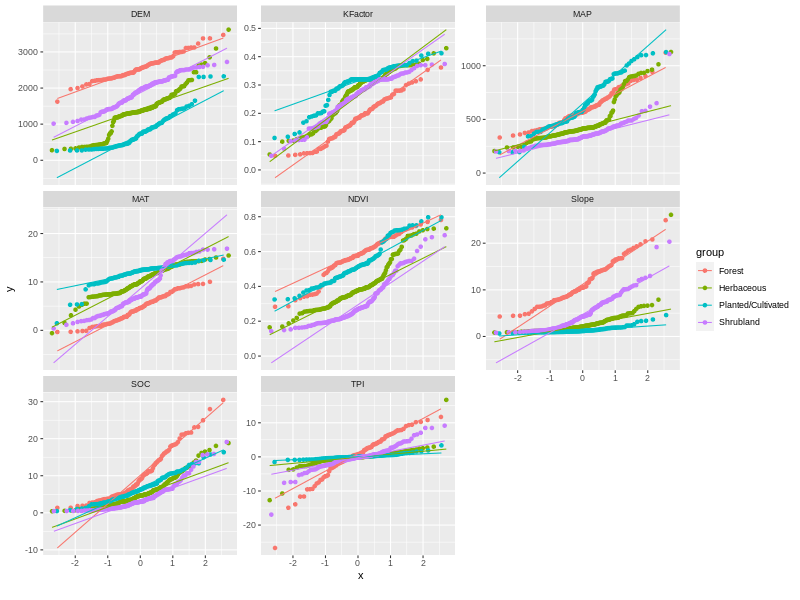

In [ ]:
%%R -w 800 -h 600 -u px

mf  |>
  dplyr::select(SOC, DEM, MAP, MAT, NDVI, KFactor, Slope, TPI, NLCD)  |>
  plot_qq(by = 'NLCD')

### Correlation plot

`plot_correlation` function creates a correlation heatmap for all discrete categories.

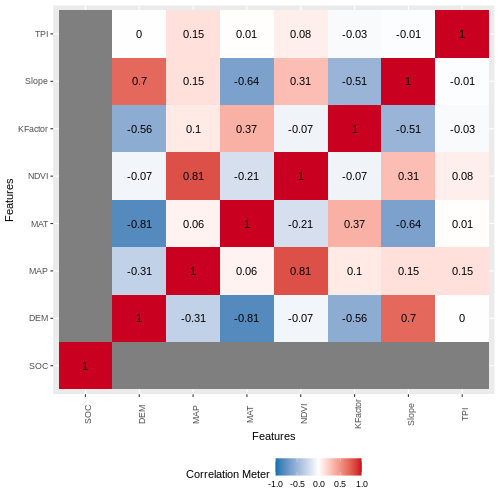

In [ ]:
%%R -w 500 -h 500 -u px

mf  |>
  dplyr::select(SOC, DEM, MAP, MAT, NDVI, KFactor, Slope, TPI)  |>
  plot_correlation()

### Boxplot

`plot_boxplot()` function creates boxplot for each continuous feature based on a selected feature.


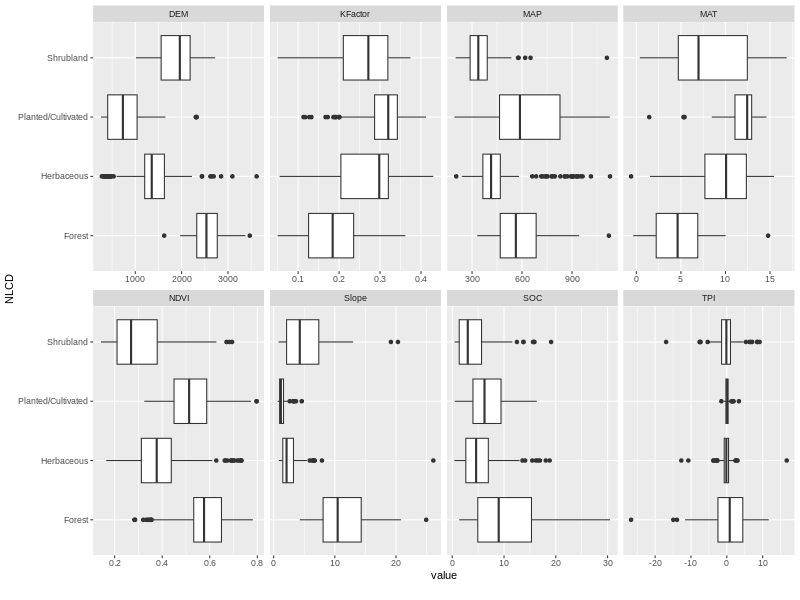

In [ ]:
%%R -w 800 -h 600 -u px

mf  |>
  dplyr::select(SOC, DEM, MAP, MAT, NDVI, KFactor, Slope, TPI, NLCD)  |>
  plot_boxplot(by = 'NLCD')

### Scatter plot

`plot_scatterplot() function creates scatterplot for all features fixing on a selected feature.

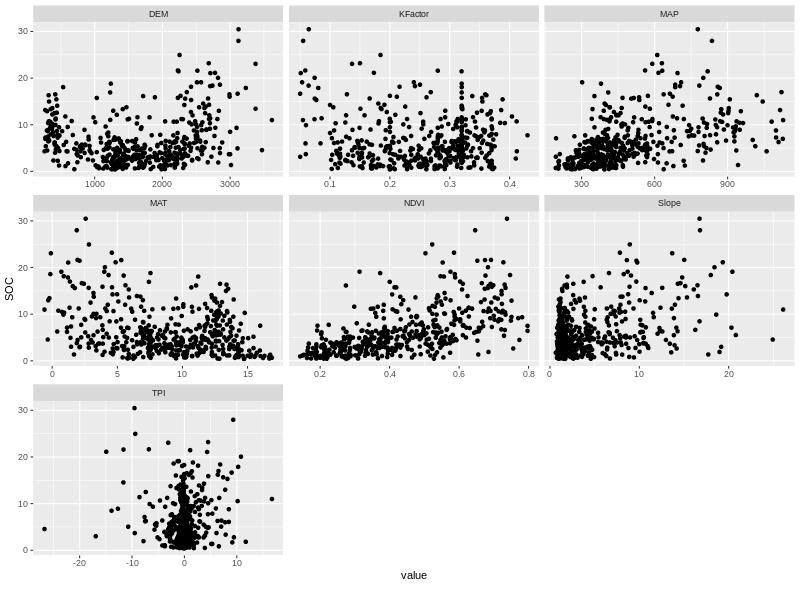

In [ ]:
%%R -w 800 -h 600 -u px

mf  |>
  dplyr::select(SOC, DEM, MAP, MAT, NDVI, KFactor, Slope, TPI)  |>
  plot_scatterplot( by = "SOC")

### Principal component analysis

Principal Component Analysis (PCA) is a widely used data analysis technique that helps identify the underlying patterns and relationships between variables in a dataset. The primary goal of PCA is to simplify complex datasets by reducing the number of variables while preserving as much of the original data as possible. This technique is advantageous when dealing with datasets with many variables, some of which may be highly correlated.

PCA transforms the original dataset into a new set of variables called principal components. These principal components are uncorrelated with each other and are ordered in terms of the amount of variance they explain in the original dataset. The first principal component accounts for the most variance, followed by the second, and so on. By selecting only the principal components that explain the majority of the variance, we can reduce the dimensionality of the dataset while retaining most of the information.

Overall, PCA is a powerful tool for data analysts and scientists who need to explore complex datasets with many variables. Reducing the dimensionality of the data can help identify underlying patterns and relationships that might otherwise be difficult to detect.

`plot_prcomp()` visualize output of principal component analysis

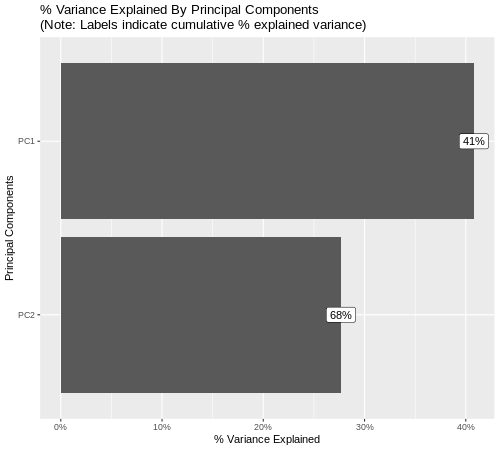

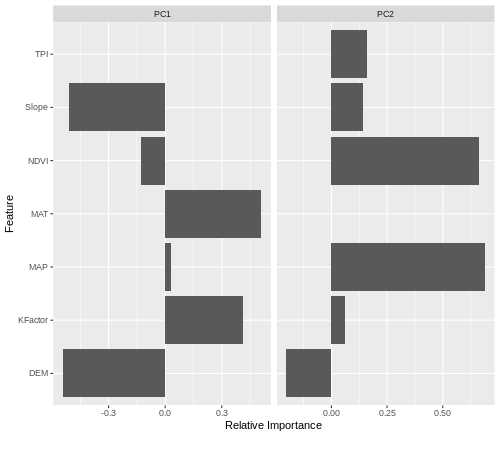

In [ ]:
%%R -w 500 -h 450 -u px
mf  |>
  dplyr::select(DEM, MAP, MAT, NDVI, KFactor, Slope, TPI)  |>
  plot_prcomp ()


## Feature Engineering

Feature engineering is an essential process in preparing data for machine learning models. It involves creating or modifying new features to improve the model's performance. The process requires a deep understanding of the data and the problem.

Practical feature engineering can significantly improve the accuracy and generalization of the model. It helps the machine learning model to identify and extract relevant information from the data. Feature engineering can also help to reduce overfitting, which occurs when the model is too closely matched to the training data and, as a result, performs poorly on the test data.

Some standard techniques used in feature engineering include feature scaling, feature extraction, and feature selection. Feature scaling helps to normalize the data by transforming it to a standard scale. Feature extraction involves transforming raw data into features that can be used for modeling. Feature selection involves identifying and selecting the most relevant features that contribute the most to the model's performance while discarding the redundant ones.

Some of the commonly used techniques in feature engineering are:

1. **Feature scaling**: This involves scaling the features to a specific range to ensure they are on the same scale and have equal weightage during model training.

2. **One-hot encoding**: This technique converts categorical variables into dummy variables that can be used in mathematical equations.

3. **Feature extraction**: Extracting important features from raw data using techniques like PCA, LDA, or t-SNE.

4.**Imputation**: This technique is used to fill in missing values in the dataset, which can be done using mean, median, or mode.

5. **Feature selection**: This involves selecting the most relevant features that contribute the most to the model's accuracy and removing redundant or irrelevant features. T

These techniques can help improve the performance and accuracy of machine learning models by creating better features that accurately represent the underlying data.




### Sum up small categories

When dealing with data containing a large number of small categories in a variable, it can be challenging to analyze and make sense of the information. However, one helpful technique is to aggregate these small categories into a single category named "OTHER." This process involves selecting the specific variable you want to modify and setting a threshold to determine what percentage of the data should be included in the "OTHER" category. By doing this, you can reduce the number of categories you have to deal with, simplify your data analysis, and make it easier to draw meaningful conclusions from your data.

The variable `FRG` has 3 categories, all of which have less then 5% of observations. Cumulatively (together) they add up to 9%. Thus, we can use 9% as a threshold and end up with only 4 groups.

In [ ]:
%%R
janitor::tabyl(mf$FRG)  |>
  mutate(percent = round(percent*100)) |>
  arrange(-percent)

                mf$FRG   n percent
  Fire Regime Group II 252      54
 Fire Regime Group III 100      21
  Fire Regime Group IV  75      16
   Fire Regime Group I  19       4
   Fire Regime Group V  18       4
     Indeterminate FRG   7       1


`group_category()` function  will group the sparse categories for a discrete feature based on a given threshold.

In [ ]:
%%R
mf_bla <- group_category(
  mf,
  feature = "FRG",
  threshold = 0.09,
  update = T)

In [ ]:
%%R
janitor::tabyl(mf_bla$FRG) %>%
  mutate(percent = round(percent*100)) %>%
  arrange(-percent)

            mf_bla$FRG   n percent
  Fire Regime Group II 252      54
 Fire Regime Group III 100      21
  Fire Regime Group IV  75      16
                 OTHER  44       9


### Dummification

Dummification, also referred to as one-hot encoding, is a popular technique used in feature engineering to convert categorical variables into binary vectors. When working with machine learning models that require numerical input, categorical data cannot be directly processed. Therefore, dummification is used to create binary columns, also known as dummy variables, for each category present in the categorical variable. This technique creates a separate column for each category, where the presence of a binary digit represents the presence or absence of the category. This process is particularly useful in creating a more meaningful representation of categorical data, which can be further used in machine learning models for better predictions.

`dummify()` turns each category to a distinct column with binary (numeric) values.

In [ ]:
%%R
mf  |>
  dplyr::select(SOC, DEM, NLCD)  |>
  dummify(select = "NLCD") |>
  glimpse()

Rows: 471
Columns: 6
$ SOC                     <dbl> 15.763, 15.883, 18.142, 10.745, 10.479, 16.987…
$ DEM                     <dbl> 2229.079, 1889.400, 2423.048, 2484.283, 2396.1…
$ NLCD_Forest             <int> 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0…
$ NLCD_Herbaceous         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ NLCD_Planted.Cultivated <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ NLCD_Shrubland          <int> 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1…


## Summary and Conclusion

This tutorial guides you through exploring complex datasets using **DataExplorer**. It simplifies the EDA process with its one-stop solution for data profiling, summary statistics, and visualizations. The package generates insightful reports and visualizations with minimal code, making it accessible to users with varying skill levels. 'DataExplorer' handles missing data, detects outliers, and visualizes variable distribution. The interactive and intuitive nature of the generated reports allows for a dynamic exploration of data characteristics. As you integrate 'DataExplorer' into your data exploration workflow, explore its advanced features, such as the `plot_multi()` function for multivariate visualizations and the `plot_str()` function for visualizing variable structures. Remember, 'DataExplorer' simplifies and enhances the EDA process, making it an excellent choice for users seeking a straightforward yet powerful tool. With the skills acquired in this tutorial, you will be well-equipped to conduct thorough and efficient data explorations.

## References

1. [DataExplorer](http://boxuancui.github.io/DataExplorer/)

2. [Introduction to DataExplorer](https://cran.r-project.org/web/packages/DataExplorer/vignettes/dataexplorer-intro.html#exploratory-data-analysis)